In [57]:
#Load dependencies
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [58]:
#Load GraphMissingEdges
G = nx.read_gml("../predio-de-links-utfpr-2024-1\GraphMissingEdges.gml")

In [75]:
#Load Categories
categories_map = pd.read_csv('../predio-de-links-utfpr-2024-1\categories.csv')

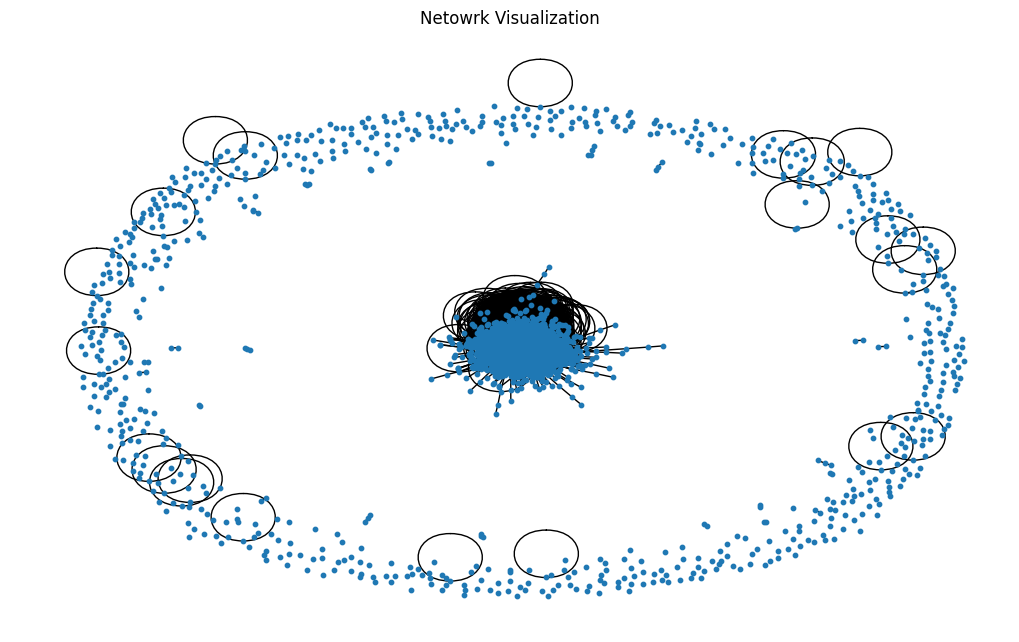

In [60]:
# Visualizar a rede
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=False, node_size=10)
plt.title("Netowrk Visualization")
plt.show()

In [61]:
# Número de nós e arestas
num_nodes = len(G.nodes)
num_edges = len(G.edges)

# Densidade da rede
density = nx.density(G)

# Grau médio dos nós
avg_degree = sum(dict(G.degree()).values()) / num_nodes

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Network density:", density)
print("Average node degree:", avg_degree)

Number of nodes: 4575
Number of edges: 18991
Network density: 0.0018150582646987846
Average node degree: 8.302076502732241


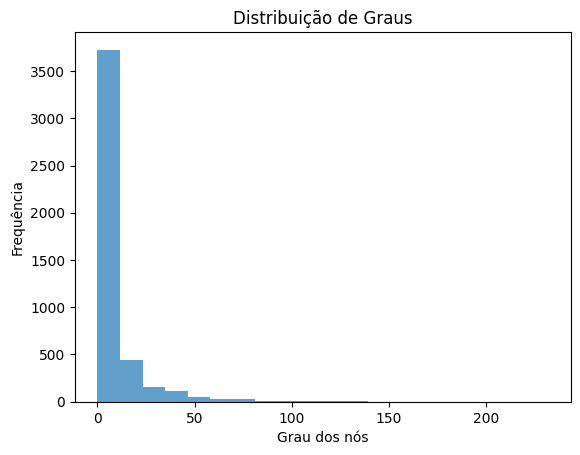

In [62]:
# Distribuição de graus
degrees = [d for n, d in G.degree()]
plt.hist(degrees, bins=20, alpha=0.7,)
plt.xlabel("Grau dos nós")
plt.ylabel("Frequência")
plt.title("Distribuição de Graus")
plt.show()

In [63]:
def compute_centrality(centrality_callback):
    # Compute degree centrality
    centrality = centrality_callback(G)

    # Sort nodes by degree centrality and get top 5
    top_5_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]

    # Print top 5 places with their categories
    print("Top 5 places according to centrality:")
    for node, centrality in top_5_centrality:
        print(f"Place: {G.nodes[node].get('name','Empty')}")
        print(f"Centrality: {centrality}")
        print(f"Categories: {G.nodes[node]['categories']}\n")
    
    return centrality

In [64]:

# Centralidade de grau
print('Degree Centrality:')
degree_centrality = compute_centrality(nx.degree_centrality)

Degree Centrality:
Top 5 places according to centrality:
Place: Gaucho Parrilla Argentina
Centrality: 0.050721469173589856
Categories: 221,64,1,83

Place: Condado Tacos
Centrality: 0.04897245299519021
Categories: 1,393,275,208,58,651

Place: Noodlehead
Centrality: 0.04634892872759073
Categories: 370,1,620,641

Place: täkō
Centrality: 0.04459991254919108
Categories: 1,420,651

Place: Bakersfield
Centrality: 0.04175776125929165
Categories: 58,275,393,208,420,83,651,1



In [65]:
# Centralidade de proximidade
print('Closeness Centrality:')
closeness_centrality = compute_centrality(nx.closeness_centrality)

Closeness Centrality:
Top 5 places according to centrality:
Place: Gaucho Parrilla Argentina
Centrality: 0.3386633071802575
Categories: 221,64,1,83

Place: täkō
Centrality: 0.3366922122688829
Categories: 1,420,651

Place: Condado Tacos
Centrality: 0.3361849274032173
Categories: 1,393,275,208,58,651

Place: Smallman Galley
Centrality: 0.3337425582725102
Categories: 275,604,420,173,1,58,641

Place: Bakersfield
Centrality: 0.33370690582530665
Categories: 58,275,393,208,420,83,651,1



In [66]:
# Detecção de comunidades
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)

print("Número de comunidades detectadas:", len(communities))


Número de comunidades detectadas: 883


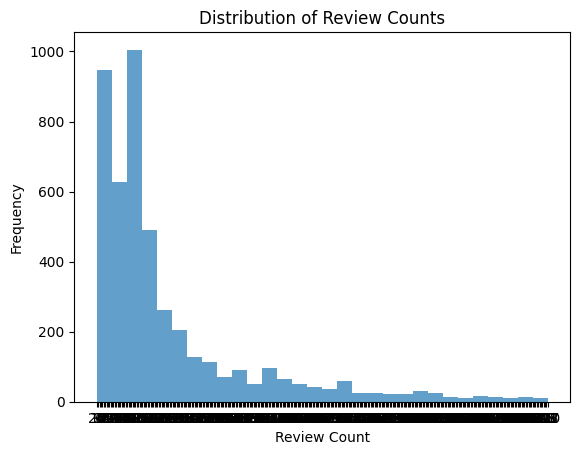

In [67]:
# Extract review counts
review_counts = [G.nodes[n]["reviewCount"] for n in G.nodes]

# Plot histogram of review counts
plt.hist(review_counts, bins=30, alpha=0.7)
plt.xlabel("Review Count")
plt.ylabel("Frequency")
plt.title("Distribution of Review Counts")
plt.show()


In [82]:
from copy import copy
categories_map.head()
# Set "CategoryId" as the index and convert to dictionary
category_mapping = copy(categories_map)
category_dict = category_mapping.set_index("CategoryId")["names"].to_dict()

print(category_dict)

{0: 'Town Car Service', 1: 'Restaurants', 2: 'Wedding Planning', 3: 'Professional Services', 4: 'Comic Books', 5: 'Venues & Event Spaces', 6: 'Computers', 7: 'Axe Throwing', 8: 'Cycling Classes', 9: 'Creperies', 10: 'Martial Arts', 11: 'Vinyl Records', 12: 'Education', 13: 'Macarons', 14: 'Grocery', 15: 'DJs', 16: 'Cryotherapy', 17: 'Comedy Clubs', 18: 'Horseback Riding', 19: 'Physical Therapy', 20: 'Appliances & Repair', 21: 'Personal Injury Law', 22: 'Septic Services', 23: "Men's Clothing", 24: 'Automotive', 25: 'Funeral Services & Cemeteries', 26: 'Travel Services', 27: 'Gymnastics', 28: 'Pakistani', 29: 'Bike Repair/Maintenance', 30: 'Brasseries', 31: 'University Housing', 32: 'Hotels & Travel', 33: 'Festivals', 34: 'Occupational Therapy', 35: 'Auction Houses', 36: 'Swimming Lessons/Schools', 37: 'Marketing', 38: 'Toy Stores', 39: 'Dumpster Rental', 40: 'Street Vendors', 41: 'Historical Tours', 42: 'Assisted Living Facilities', 43: 'Gas Stations', 44: 'Waterproofing', 45: 'Immigrat

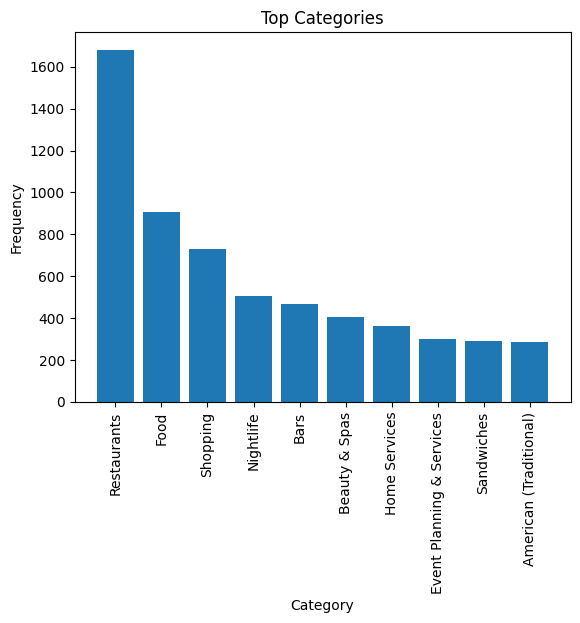

In [86]:
# Extract categories
categories = [G.nodes[n]["categories"].split(',') for n in G.nodes]

# Flatten list of categories
categories_flat = [category for sublist in categories for category in sublist]

# Count occurrence of each category
category_counts = {category: categories_flat.count(category) for category in set(categories_flat)}

# Plot top categories
top_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:10]

categories_labels = [category_dict[int(category[0])] for category in top_categories]
categories_values = [category[1] for category in top_categories]

plt.bar(categories_labels, categories_values)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Top Categories")
plt.xticks(rotation=90)
plt.show()

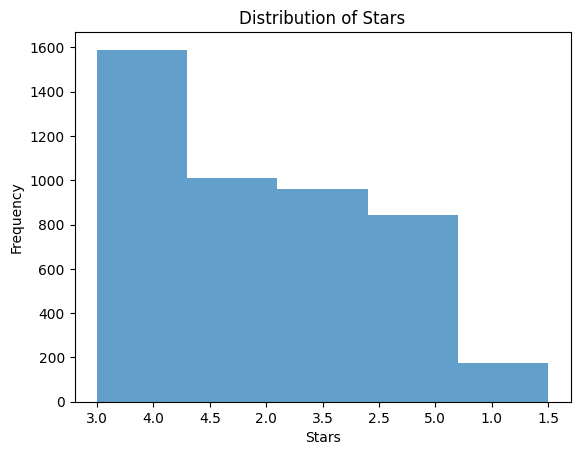

In [69]:
# Extract stars
stars = [G.nodes[n]["stars"] for n in G.nodes]

# Plot histogram of stars
plt.hist(stars, bins=5, alpha=0.7)
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.title("Distribution of Stars")
plt.show()


In [88]:
from geopy.geocoders import Nominatim
from functools import lru_cache

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="mobility_network_analysis")

# Add cache to reduce execution time
@lru_cache(maxsize=None)

# Function to get country from latitude and longitude
def get_country_state(latitude, longitude):
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    if location:
        address = location.raw.get("address")
        if address:
            country = address.get("country")
            state = address.get("state")
            return country, state
    return None, None

# Get latitude and longitude of each node
node_coordinates = {node: (G.nodes[node]["latitude"], G.nodes[node]["longitude"]) for node in G.nodes}

# Reverse geocode coordinates to get country
node_countries = {node: get_country_state(coords[0], coords[1]) for node, coords in node_coordinates.items()}

# Count occurrences of each country
country_counts_map = {}
state_counts_map = {}
for country_state in node_countries.values():
    if type(country_state) == tuple:
        country_counts_map[country_state[0]] = country_counts_map.get(country_state[0], 0) + 1
        state_counts_map[country_state[1]] = state_counts_map.get(country_state[1], 0) + 1
    else:
        country_counts_map[country_state] = country_counts_map.get(country_state, 0) + 1

# Sort countries by frequency
sorted_countries = sorted(country_counts_map.items(), key=lambda x: x[1], reverse=True)
# Sort states by frequency
sorted_states = sorted(state_counts_map.items(), key=lambda x: x[1], reverse=True)

# Plot top countries
top_countries = sorted_countries[:10]
country_names = [country[0] for country in top_countries]
country_counts = [country[1] for country in top_countries]

plt.bar(country_names, country_counts)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top Countries")
plt.xticks(rotation=45)
plt.show()

# Plot top states
top_states = sorted_states[:10]
state_names = [state[0] for state in top_states]
state_counts = [state[1] for state in top_states]

plt.bar(state_names, state_counts)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top Countries")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Prepare dataframe for analysis
links_df = pd.read_csv("edgesToEvaluate.csv")

# Add attributes to the dataframe
links_df["reviewCount1"] = links_df["venue1"].apply(lambda x: G.nodes[x]["reviewCount"])
links_df["reviewCount2"] = links_df["venue2"].apply(lambda x: G.nodes[x]["reviewCount"])
links_df["stars1"] = links_df["venue1"].apply(lambda x: G.nodes[x]["stars"])
links_df["stars2"] = links_df["venue2"].apply(lambda x: G.nodes[x]["stars"])

# Compute correlation
correlation_matrix = links_df.corr()
correlation_with_links = correlation_matrix["link"]

# Identify most important attribute
most_important_attribute = correlation_with_links.drop("link").idxmax()
correlation_value = correlation_with_links.drop("link").max()

print("Most important attribute to define links:", most_important_attribute)
print("Correlation with links:", correlation_value)
